In [2]:
import os

output_model_path = os.environ["DATA"] + "/05_chapter_SOTA/04.03_search_disgraceful_molecule_aspirin_isomer"
output_fig_path = os.environ["FIGURES"] + "/05_chapter_SOTA/04.03_search_disgraceful_molecule_aspirin_isomer"

aspirin_formula = "C9H8O4"


# QED lin sigm
a_qed = -1
b_qed = 0.75
l_qed = 20

# SAScore gaussian
mu_sa = 5
sigma_sa = 0.5

# Gaussian isomer
mu_iso = 1
sigma_iso=0.05


### Defining wrappers

In [3]:
from math import exp
from scipy.stats import norm

def gaussian_wrapper(value, mu, sigma):
    return norm(loc=mu, scale=sigma).pdf(value)

def lin_sigm_wrapper(value, a, b, l):
    return 1 / (1 + exp(l * (a * value + b)))


### Testing QED

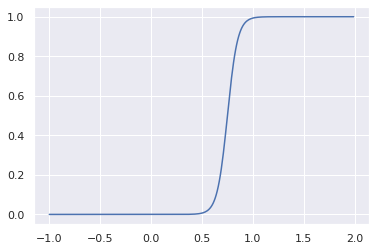

In [4]:
import numpy as np
import seaborn as sns
sns.set()

x_arr = np.arange(-1, 2, 0.01)
y_arr = []
for x in x_arr:
    y_arr.append(lin_sigm_wrapper(x, a_qed, b_qed, l_qed))
    
sns.lineplot(x_arr, y_arr)

### Testing SA

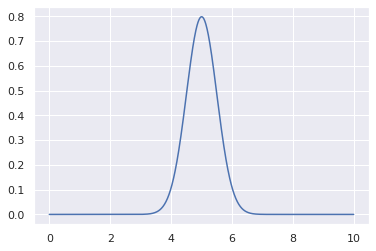

In [5]:
x_arr = np.arange(0, 10, 0.01)
y_arr = []
for x in x_arr:
    y_arr.append(gaussian_wrapper(x, mu_sa, sigma_sa))
    
sns.lineplot(x_arr, y_arr)

### Testing isomers

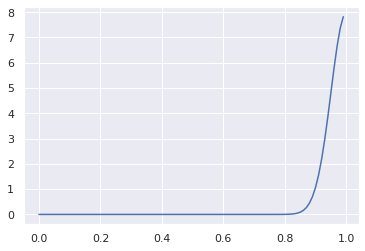

In [7]:
x_arr = np.arange(0, 1, 0.01)
y_arr = []
for x in x_arr:
    y_arr.append(gaussian_wrapper(x, mu_iso, sigma_iso))
    
sns.lineplot(x_arr, y_arr)

### Defining objective function

In [8]:
from evomol.evomol.molgraphops.molgraph import MolGraph
from rdkit.Chem import MolFromSmiles
from evomol.evomol.evaluation import QEDEvaluationStrategy, SAScoreEvaluationStrategy
from guacamol.common_scoring_functions import IsomerScoringFunction

guacamol_scoring_function = IsomerScoringFunction(aspirin_formula, mean_function="geometric")

def aspirin_isomer(smi):
    return guacamol_scoring_function.score(smi)

def obj_function(smi):
    
    molgraph = MolGraph(MolFromSmiles(smi))
    
    qed_score, _ = QEDEvaluationStrategy().evaluate_individual(molgraph)
    sa_score, _ = SAScoreEvaluationStrategy().evaluate_individual(molgraph)
    isomer_score = aspirin_isomer(smi)
    
    
    return np.prod([lin_sigm_wrapper(qed_score, a_qed, b_qed, l_qed), gaussian_wrapper(sa_score, mu_sa, sigma_sa),
                    gaussian_wrapper(isomer_score, mu, sigma)])

Using TensorFlow backend.


### Launching model

In [128]:
from evomol.evomol import run_model

run_model({
    "obj_function": (obj_function, "isomer_aspirin_high_sa_high_qed"),
    "action_space_parameters":{
        "atoms": "C,O"
    },
    "io_parameters": {
        "model_path": output_model_path
    }
})

SYMBOLS LIST : ['C', 'O']
Computing descriptors at initialization...
Start pop algorithm
isomer_aspirin_high_sa_high_qed_mean : 0.00000
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.00000
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.00000
total_mean : 0.00000
total_med : 0.00000
total_std : 0.00000
total_min : 0.00000
total_max : 0.00000
new step
step : 0
best : C
isomer_aspirin_high_sa_high_qed_mean : 0.00000
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.00000
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.00000
total_mean : 0.00000
total_med : 0.00000
total_std : 0.00000
total_min : 0.00000
total_max : 0.00000
new step
step : 1
best : O
isomer_aspirin_high_sa_high_qed_mean : 0.00000
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.00000
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_a

isomer_aspirin_high_sa_high_qed_mean : 0.00000
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.00000
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.00000
total_mean : 0.00000
total_med : 0.00000
total_std : 0.00000
total_min : 0.00000
total_max : 0.00000
new step
step : 23
best : C#CC(CC)OC#COO
isomer_aspirin_high_sa_high_qed_mean : 0.00000
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.00000
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.00000
total_mean : 0.00000
total_med : 0.00000
total_std : 0.00000
total_min : 0.00000
total_max : 0.00000
new step
step : 24
best : C#CC(CC)OC#COO
isomer_aspirin_high_sa_high_qed_mean : 0.00000
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.00000
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.00000
total_mean : 0.00000
to

isomer_aspirin_high_sa_high_qed_mean : 0.00015
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.00208
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.03924
total_mean : 0.00015
total_med : 0.00000
total_std : 0.00208
total_min : 0.00000
total_max : 0.03924
new step
step : 47
best : CC1=C(O)OC#COC1CC#CO
isomer_aspirin_high_sa_high_qed_mean : 0.00015
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.00205
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.03924
total_mean : 0.00015
total_med : 0.00000
total_std : 0.00205
total_min : 0.00000
total_max : 0.03924
new step
step : 48
best : CC1=C(O)OC#COC1CC#CO
isomer_aspirin_high_sa_high_qed_mean : 0.00015
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.00203
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.03924
total_mean 

isomer_aspirin_high_sa_high_qed_mean : 0.00109
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.00893
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.13337
total_mean : 0.00109
total_med : 0.00000
total_std : 0.00893
total_min : 0.00000
total_max : 0.13337
new step
step : 71
best : C#CCC12OCC=COC(=C1O)O2
isomer_aspirin_high_sa_high_qed_mean : 0.00131
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.00973
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.13337
total_mean : 0.00131
total_med : 0.00000
total_std : 0.00973
total_min : 0.00000
total_max : 0.13337
new step
step : 72
best : C#CCC12OCC=COC(=C1O)O2
isomer_aspirin_high_sa_high_qed_mean : 0.00152
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.01086
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.13337
total_m

isomer_aspirin_high_sa_high_qed_mean : 0.00231
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.01282
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.13337
total_mean : 0.00231
total_med : 0.00000
total_std : 0.01282
total_min : 0.00000
total_max : 0.13337
new step
step : 95
best : C#CCC12OCC=COC(=C1O)O2
isomer_aspirin_high_sa_high_qed_mean : 0.00233
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.01281
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.13337
total_mean : 0.00233
total_med : 0.00000
total_std : 0.01281
total_min : 0.00000
total_max : 0.13337
new step
step : 96
best : C#CCC12OCC=COC(=C1O)O2
isomer_aspirin_high_sa_high_qed_mean : 0.00243
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.01331
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.13337
total_m

isomer_aspirin_high_sa_high_qed_mean : 0.00436
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.02264
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.35141
total_mean : 0.00436
total_med : 0.00000
total_std : 0.02264
total_min : 0.00000
total_max : 0.35141
new step
step : 119
best : C#CC1=C(OCCO)OC#COC1
isomer_aspirin_high_sa_high_qed_mean : 0.00437
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.02263
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.35141
total_mean : 0.00437
total_med : 0.00000
total_std : 0.02263
total_min : 0.00000
total_max : 0.35141
new step
step : 120
best : C#CC1=C(OCCO)OC#COC1
isomer_aspirin_high_sa_high_qed_mean : 0.00438
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.02263
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.35141
total_mea

isomer_aspirin_high_sa_high_qed_mean : 0.00584
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.02615
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.35141
total_mean : 0.00584
total_med : 0.00000
total_std : 0.02615
total_min : 0.00000
total_max : 0.35141
new step
step : 143
best : C#CC1=C(OCCO)OC#COC1
isomer_aspirin_high_sa_high_qed_mean : 0.00607
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.02684
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.35141
total_mean : 0.00607
total_med : 0.00000
total_std : 0.02684
total_min : 0.00000
total_max : 0.35141
new step
step : 144
best : C#CC1=C(OCCO)OC#COC1
isomer_aspirin_high_sa_high_qed_mean : 0.00634
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.02804
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.35141
total_mea

isomer_aspirin_high_sa_high_qed_mean : 0.00960
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.03775
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.48757
total_mean : 0.00960
total_med : 0.00000
total_std : 0.03775
total_min : 0.00000
total_max : 0.48757
new step
step : 167
best : C#CCOC1=C2C=C(O)COC1O2
isomer_aspirin_high_sa_high_qed_mean : 0.00967
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.03777
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.48757
total_mean : 0.00967
total_med : 0.00000
total_std : 0.03777
total_min : 0.00000
total_max : 0.48757
new step
step : 168
best : C#CCOC1=C2C=C(O)COC1O2
isomer_aspirin_high_sa_high_qed_mean : 0.00967
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.03777
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.48757
total

isomer_aspirin_high_sa_high_qed_mean : 0.01454
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.05253
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.77942
total_mean : 0.01454
total_med : 0.00000
total_std : 0.05253
total_min : 0.00000
total_max : 0.77942
new step
step : 190
best : C#COc1oc#cc1C(O)COC
isomer_aspirin_high_sa_high_qed_mean : 0.01462
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.05255
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 0.77942
total_mean : 0.01462
total_med : 0.00000
total_std : 0.05255
total_min : 0.00000
total_max : 0.77942
new step
step : 191
best : C#COc1oc#cc1C(O)COC
isomer_aspirin_high_sa_high_qed_mean : 0.01600
isomer_aspirin_high_sa_high_qed_med : 0.00000
isomer_aspirin_high_sa_high_qed_std : 0.06689
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 1.32413
total_mean 

isomer_aspirin_high_sa_high_qed_mean : 0.02353
isomer_aspirin_high_sa_high_qed_med : 0.00004
isomer_aspirin_high_sa_high_qed_std : 0.08921
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 1.32413
total_mean : 0.02353
total_med : 0.00004
total_std : 0.08921
total_min : 0.00000
total_max : 1.32413
new step
step : 212
best : COCCc1c#coc1OC#CO
isomer_aspirin_high_sa_high_qed_mean : 0.02355
isomer_aspirin_high_sa_high_qed_med : 0.00005
isomer_aspirin_high_sa_high_qed_std : 0.08920
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 1.32413
total_mean : 0.02355
total_med : 0.00005
total_std : 0.08920
total_min : 0.00000
total_max : 1.32413
new step
step : 213
best : COCCc1c#coc1OC#CO
isomer_aspirin_high_sa_high_qed_mean : 0.02428
isomer_aspirin_high_sa_high_qed_med : 0.00005
isomer_aspirin_high_sa_high_qed_std : 0.09028
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 1.32413
total_mean : 0.

isomer_aspirin_high_sa_high_qed_mean : 0.03960
isomer_aspirin_high_sa_high_qed_med : 0.00049
isomer_aspirin_high_sa_high_qed_std : 0.12769
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 1.74534
total_mean : 0.03960
total_med : 0.00049
total_std : 0.12769
total_min : 0.00000
total_max : 1.74534
new step
step : 234
best : CCOC#CCOc1oc#cc1O
isomer_aspirin_high_sa_high_qed_mean : 0.04178
isomer_aspirin_high_sa_high_qed_med : 0.00053
isomer_aspirin_high_sa_high_qed_std : 0.13350
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 1.74534
total_mean : 0.04178
total_med : 0.00053
total_std : 0.13350
total_min : 0.00000
total_max : 1.74534
new step
step : 235
best : CCOC#CCOc1oc#cc1O
isomer_aspirin_high_sa_high_qed_mean : 0.04232
isomer_aspirin_high_sa_high_qed_med : 0.00056
isomer_aspirin_high_sa_high_qed_std : 0.13429
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 1.74534
total_mean : 0.

isomer_aspirin_high_sa_high_qed_mean : 0.07701
isomer_aspirin_high_sa_high_qed_med : 0.00162
isomer_aspirin_high_sa_high_qed_std : 0.28065
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 3.51263
total_mean : 0.07701
total_med : 0.00162
total_std : 0.28065
total_min : 0.00000
total_max : 3.51263
new step
step : 257
best : Oc1oc#cc1OCC1=CCCO1
isomer_aspirin_high_sa_high_qed_mean : 0.07934
isomer_aspirin_high_sa_high_qed_med : 0.00168
isomer_aspirin_high_sa_high_qed_std : 0.28614
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 3.51263
total_mean : 0.07934
total_med : 0.00168
total_std : 0.28614
total_min : 0.00000
total_max : 3.51263
new step
step : 258
best : Oc1oc#cc1OCC1=CCCO1
isomer_aspirin_high_sa_high_qed_mean : 0.08115
isomer_aspirin_high_sa_high_qed_med : 0.00173
isomer_aspirin_high_sa_high_qed_std : 0.28858
isomer_aspirin_high_sa_high_qed_min : 0.00000
isomer_aspirin_high_sa_high_qed_max : 3.51263
total_mean 

isomer_aspirin_high_sa_high_qed_mean : 0.18408
isomer_aspirin_high_sa_high_qed_med : 0.00632
isomer_aspirin_high_sa_high_qed_std : 0.51501
isomer_aspirin_high_sa_high_qed_min : 0.00005
isomer_aspirin_high_sa_high_qed_max : 3.54702
total_mean : 0.18408
total_med : 0.00632
total_std : 0.51501
total_min : 0.00005
total_max : 3.54702
new step
step : 279
best : CC1=C(OCc2c#coc2O)CO1
isomer_aspirin_high_sa_high_qed_mean : 0.18683
isomer_aspirin_high_sa_high_qed_med : 0.00681
isomer_aspirin_high_sa_high_qed_std : 0.52046
isomer_aspirin_high_sa_high_qed_min : 0.00006
isomer_aspirin_high_sa_high_qed_max : 3.54702
total_mean : 0.18683
total_med : 0.00681
total_std : 0.52046
total_min : 0.00006
total_max : 3.54702
new step
step : 280
best : CC1=C(OCc2c#coc2O)CO1
isomer_aspirin_high_sa_high_qed_mean : 0.19868
isomer_aspirin_high_sa_high_qed_med : 0.00727
isomer_aspirin_high_sa_high_qed_std : 0.54696
isomer_aspirin_high_sa_high_qed_min : 0.00007
isomer_aspirin_high_sa_high_qed_max : 3.57867
total_m

isomer_aspirin_high_sa_high_qed_mean : 0.33136
isomer_aspirin_high_sa_high_qed_med : 0.02199
isomer_aspirin_high_sa_high_qed_std : 0.71987
isomer_aspirin_high_sa_high_qed_min : 0.00071
isomer_aspirin_high_sa_high_qed_max : 3.59783
total_mean : 0.33136
total_med : 0.02199
total_std : 0.71987
total_min : 0.00071
total_max : 3.59783
new step
step : 301
best : OC1=C(OCc2c#coc2)OCC1
isomer_aspirin_high_sa_high_qed_mean : 0.34245
isomer_aspirin_high_sa_high_qed_med : 0.02338
isomer_aspirin_high_sa_high_qed_std : 0.73223
isomer_aspirin_high_sa_high_qed_min : 0.00077
isomer_aspirin_high_sa_high_qed_max : 3.59783
total_mean : 0.34245
total_med : 0.02338
total_std : 0.73223
total_min : 0.00077
total_max : 3.59783
new step
step : 302
best : OC1=C(OCc2c#coc2)OCC1
isomer_aspirin_high_sa_high_qed_mean : 0.34888
isomer_aspirin_high_sa_high_qed_med : 0.02380
isomer_aspirin_high_sa_high_qed_std : 0.73744
isomer_aspirin_high_sa_high_qed_min : 0.00081
isomer_aspirin_high_sa_high_qed_max : 3.59783
total_m

isomer_aspirin_high_sa_high_qed_mean : 0.50527
isomer_aspirin_high_sa_high_qed_med : 0.05047
isomer_aspirin_high_sa_high_qed_std : 0.87654
isomer_aspirin_high_sa_high_qed_min : 0.00302
isomer_aspirin_high_sa_high_qed_max : 3.60743
total_mean : 0.50527
total_med : 0.05047
total_std : 0.87654
total_min : 0.00302
total_max : 3.60743
new step
step : 323
best : OC1=C(OCc2c#coc2)CCO1
isomer_aspirin_high_sa_high_qed_mean : 0.51434
isomer_aspirin_high_sa_high_qed_med : 0.05245
isomer_aspirin_high_sa_high_qed_std : 0.88252
isomer_aspirin_high_sa_high_qed_min : 0.00310
isomer_aspirin_high_sa_high_qed_max : 3.68026
total_mean : 0.51434
total_med : 0.05245
total_std : 0.88252
total_min : 0.00310
total_max : 3.68026
new step
step : 324
best : OC1=C(OCc2cc#co2)CCO1
isomer_aspirin_high_sa_high_qed_mean : 0.51846
isomer_aspirin_high_sa_high_qed_med : 0.05335
isomer_aspirin_high_sa_high_qed_std : 0.88306
isomer_aspirin_high_sa_high_qed_min : 0.00334
isomer_aspirin_high_sa_high_qed_max : 3.68026
total_m

isomer_aspirin_high_sa_high_qed_mean : 0.68229
isomer_aspirin_high_sa_high_qed_med : 0.12797
isomer_aspirin_high_sa_high_qed_std : 0.97304
isomer_aspirin_high_sa_high_qed_min : 0.01103
isomer_aspirin_high_sa_high_qed_max : 3.68344
total_mean : 0.68229
total_med : 0.12797
total_std : 0.97304
total_min : 0.01103
total_max : 3.68344
new step
step : 345
best : OC1=C(OCc2cc#co2)OCC1
isomer_aspirin_high_sa_high_qed_mean : 0.69326
isomer_aspirin_high_sa_high_qed_med : 0.13557
isomer_aspirin_high_sa_high_qed_std : 0.97644
isomer_aspirin_high_sa_high_qed_min : 0.01146
isomer_aspirin_high_sa_high_qed_max : 3.68344
total_mean : 0.69326
total_med : 0.13557
total_std : 0.97644
total_min : 0.01146
total_max : 3.68344
new step
step : 346
best : OC1=C(OCc2cc#co2)OCC1
isomer_aspirin_high_sa_high_qed_mean : 0.70093
isomer_aspirin_high_sa_high_qed_med : 0.13928
isomer_aspirin_high_sa_high_qed_std : 0.97852
isomer_aspirin_high_sa_high_qed_min : 0.01230
isomer_aspirin_high_sa_high_qed_max : 3.68344
total_m

isomer_aspirin_high_sa_high_qed_mean : 0.88977
isomer_aspirin_high_sa_high_qed_med : 0.41859
isomer_aspirin_high_sa_high_qed_std : 1.03829
isomer_aspirin_high_sa_high_qed_min : 0.02225
isomer_aspirin_high_sa_high_qed_max : 3.68344
total_mean : 0.88977
total_med : 0.41859
total_std : 1.03829
total_min : 0.02225
total_max : 3.68344
new step
step : 367
best : OC1=C(OCc2cc#co2)OCC1
isomer_aspirin_high_sa_high_qed_mean : 0.90022
isomer_aspirin_high_sa_high_qed_med : 0.45741
isomer_aspirin_high_sa_high_qed_std : 1.03957
isomer_aspirin_high_sa_high_qed_min : 0.02273
isomer_aspirin_high_sa_high_qed_max : 3.68344
total_mean : 0.90022
total_med : 0.45741
total_std : 1.03957
total_min : 0.02273
total_max : 3.68344
new step
step : 368
best : OC1=C(OCc2cc#co2)OCC1
isomer_aspirin_high_sa_high_qed_mean : 0.90763
isomer_aspirin_high_sa_high_qed_med : 0.47742
isomer_aspirin_high_sa_high_qed_std : 1.04149
isomer_aspirin_high_sa_high_qed_min : 0.02359
isomer_aspirin_high_sa_high_qed_max : 3.68344
total_m

### Drawing solution

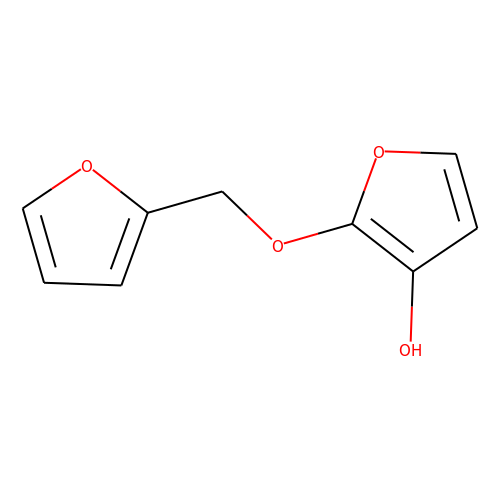

In [9]:
sol = MolGraph(MolFromSmiles("CCC12OC34OC5(O3)C1C(O)=CC425"))
sol = MolGraph(MolFromSmiles("OCCC12C3=CC45OC1C4C2(O3)O5"))
sol = MolGraph(MolFromSmiles("O=C(O)CCC1c2coc(=O)cc21"))
sol = MolGraph(MolFromSmiles("C#CC(CC12OCC1C2=O)C(=O)O"))
sol = MolGraph(MolFromSmiles("OC1=C(OCc2cc#co2)OCC1"))
sol = MolGraph(MolFromSmiles("Oc1ccoc1OCc1ccco1"))





sol.draw(size=500, show=False)

In [10]:
qed_score, _ = QEDEvaluationStrategy().evaluate_individual(sol)
print("QED : " + str(qed_score))


QED : 0.7857650959385954


In [11]:
sa_score, _ = SAScoreEvaluationStrategy().evaluate_individual(sol)
print("SAScore : " + str(sa_score))


SAScore : 2.905109385636356


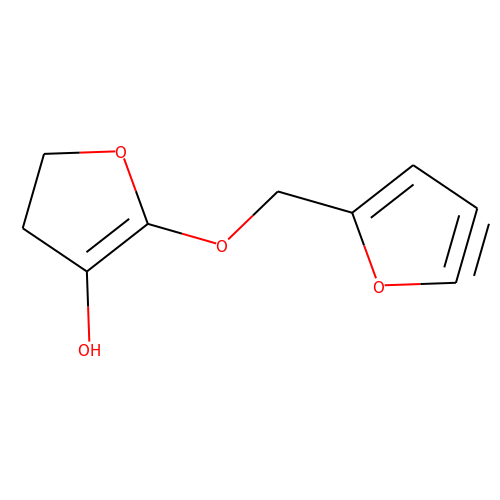

In [132]:
from os.path import join

sol.draw(write_to_path=join(output_fig_path, "mol.png"), size=500, show=False)

### Aspirin comparison

In [133]:
asp = MolGraph(MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O"))
qed_score, _ = QEDEvaluationStrategy().evaluate_individual(asp)
print("QED : " + str(qed_score))
sa_score, _ = SAScoreEvaluationStrategy().evaluate_individual(asp)
print("SAScore : " + str(sa_score))



QED : 0.5501217966938848
SAScore : 1.580039750008826
